## Desafío - Dimensionalidad y Agrupación (I)

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__

* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip`.

### Contexto

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características *Amabilidad*, *Escrupolisidad*, *Extroversión*, *Neuroticismo*, *Apertura*.
Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

    1: No me representa para nada.
    2: No me representa.
    3: Algunas cosas no me representan. 
    4: Algunas cosas me representan.
    5: Me representa.
    6: Me representa completamente.

Las 25 preguntas son:

* `A1` Soy indiferente a los sentimientos de otros.
* `A2` Me preocupo del bienestar de otros.
* `A3` Sé cómo confortar a otros.
* `A4` Me agradan los niños.
* `A5` Hago sentir tranquila a la gente.
* `C1` Soy exacto en mi trabajo.
* `C2` Sigo con mis tareas hasta que todo esté perfecto.
* `C3` Hago cosas siguiendo un plan.
* `C4` Hago cosas con el mínimo esfuerzo.
* `C5` Pierdo mi tiempo.
* `E1` No hablo mucho con las personas.
* `E2` Me es dificil acercarme a otros.
* `E3` Sé cómo cautivar gente.
* `E4` Hago amigos de forma fácil.
* `E5` Puedo tomar el cargo de las cosas.
* `N1` Me enojo con facilidad.
* `N2` Me irrito con facilidad.
* `N3` Tengo cambios de humor frecuentes.
* `N4` Usualmente me siento melancólico.
* `N5` Entro en pánico con facilidad.
* `O1` Estoy lleno de ideas.
* `O2` Evito leer material difícil.
* `O3` Tiendo a llevar la conversación a niveles más altos.
* `O4` Dedico tiempo a la reflexión de cosas.
* `O5` No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:

* `gender` Hombre = 1, Mujer = 2.
* `education` 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* `age` Edad en Años.

Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.

### Desafío 1: Lectura de archivos.

* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones. 
* Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
* Solicite las primeras 5 observaciones con `head`.

In [1]:
# Librerías básicoas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Importo statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,6)

import factor_analyzer as factor
import missingno as msgn

In [2]:
df = pd.read_csv('bfi.csv')
df.head()

Unnamed: 0   A1   A2   A3   A4   A5   C1   C2   C3   C4  ...   N4   N5  \
0       61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  ...  2.0  3.0   
1       61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  ...  5.0  5.0   
2       61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  ...  2.0  3.0   
3       61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  ...  4.0  1.0   
4       61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  ...  4.0  3.0   

    O1  O2   O3   O4   O5  gender  education  age  
0  3.0   6  3.0  4.0  3.0       1        NaN   16  
1  4.0   2  4.0  3.0  3.0       2        NaN   18  
2  4.0   2  5.0  5.0  2.0       2        NaN   17  
3  3.0   3  4.0  3.0  5.0       2        NaN   17  
4  3.0   3  4.0  3.0  3.0       1        NaN   17  

[5 rows x 29 columns]

### Desafío 2: Preprocesamiento

* Elimine las columnas redundantes de la base, tal como `'Unnamed: 0'`.
* Analice el patrón de datos perdidos con `missingno`. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [3]:
clean_df = df.drop('Unnamed: 0',axis=1)
clean_df.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N4   N5   O1  O2  \
0  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  2.0  3.0  3.0   6   
1  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  5.0  5.0  4.0   2   
2  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  2.0  3.0  4.0   2   
3  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  4.0  1.0  3.0   3   
4  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  4.0  3.0  3.0   3   

    O3   O4   O5  gender  education  age  
0  3.0  4.0  3.0       1        NaN   16  
1  4.0  3.0  3.0       2        NaN   18  
2  5.0  5.0  2.0       2        NaN   17  
3  4.0  3.0  5.0       2        NaN   17  
4  4.0  3.0  3.0       1        NaN   17  

[5 rows x 28 columns]

In [4]:
# Reemplazo los valores mayores a 6 y menores a 1
clean_df[clean_df.loc[:,'A1':'O5'] > 6] = np.nan
clean_df[clean_df.loc[:,'A1':'O5'] < 1] = np.nan

In [5]:
clean_df.sample()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N4   N5   O1  \
1528  4.0  5.0  5.0  5.0  4.0  4.0  3.0  5.0  3.0  2.0  ...  4.0  1.0  6.0   

      O2   O3   O4   O5  gender  education  age  
1528   1  6.0  5.0  1.0       1        3.0   27  

[1 rows x 28 columns]

In [6]:
plt.figure(figsize=(4,4))
#msgn.matrix(clean_df)
msgn.bar(clean_df)

<Figure size 288x288 with 0 Axes>

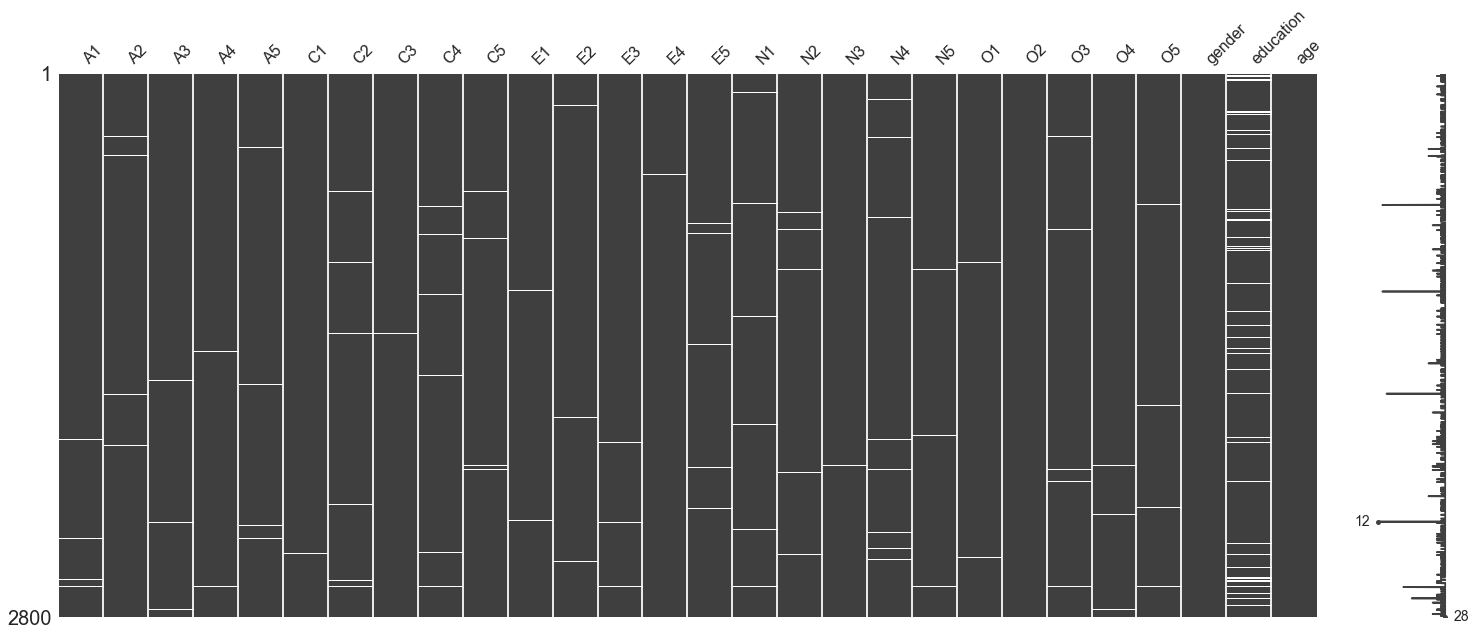

In [7]:
plt.figure(figsize=(4,4))
msgn.matrix(clean_df)

In [8]:
# Elimino datos perdidos
new_df = clean_df.dropna()
new_df.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N4   N5   O1  O2  \
5   6.0  6.0  5.0  6.0  5.0  6.0  6.0  6.0  1.0  3.0  ...  2.0  3.0  4.0   3   
7   4.0  3.0  1.0  5.0  1.0  3.0  2.0  4.0  2.0  4.0  ...  6.0  4.0  3.0   2   
10  4.0  4.0  5.0  6.0  5.0  4.0  3.0  5.0  3.0  2.0  ...  2.0  3.0  5.0   3   
14  4.0  5.0  2.0  2.0  1.0  5.0  5.0  5.0  2.0  2.0  ...  2.0  3.0  5.0   2   
22  1.0  5.0  6.0  5.0  6.0  4.0  3.0  2.0  4.0  5.0  ...  2.0  2.0  6.0   1   

     O3   O4   O5  gender  education  age  
5   5.0  6.0  1.0       2        3.0   21  
7   4.0  5.0  3.0       1        2.0   19  
10  5.0  6.0  3.0       1        1.0   21  
14  5.0  5.0  5.0       1        1.0   17  
22  5.0  5.0  2.0       1        5.0   68  

[5 rows x 28 columns]

### Desafío 3: Descripción

* Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con `heatmap`. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [9]:
new_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [10]:
# Separo las preguntas
trust_df = new_df.loc[:,'A1':'O5']
trust_df.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3   N4  \
5   6.0  6.0  5.0  6.0  5.0  6.0  6.0  6.0  1.0  3.0  ...  3.0  5.0  2.0  2.0   
7   4.0  3.0  1.0  5.0  1.0  3.0  2.0  4.0  2.0  4.0  ...  6.0  3.0  2.0  6.0   
10  4.0  4.0  5.0  6.0  5.0  4.0  3.0  5.0  3.0  2.0  ...  3.0  3.0  4.0  2.0   
14  4.0  5.0  2.0  2.0  1.0  5.0  5.0  5.0  2.0  2.0  ...  2.0  4.0  2.0  2.0   
22  1.0  5.0  6.0  5.0  6.0  4.0  3.0  2.0  4.0  5.0  ...  2.0  2.0  2.0  2.0   

     N5   O1  O2   O3   O4   O5  
5   3.0  4.0   3  5.0  6.0  1.0  
7   4.0  3.0   2  4.0  5.0  3.0  
10  3.0  5.0   3  5.0  6.0  3.0  
14  3.0  5.0   2  5.0  5.0  5.0  
22  2.0  6.0   1  5.0  5.0  2.0  

[5 rows x 25 columns]

In [31]:
# Calculo las medias

variable, mean = [],[]

for colname, serie in trust_df.iteritems():
    # guardamos el nombre en variable 
    variable.append(colname)
    # calculamos y procesamos la media 
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

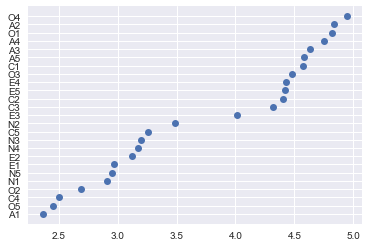

In [32]:
# Grafico
plt.plot(tmp_df['mean'], tmp_df['var'],'o')

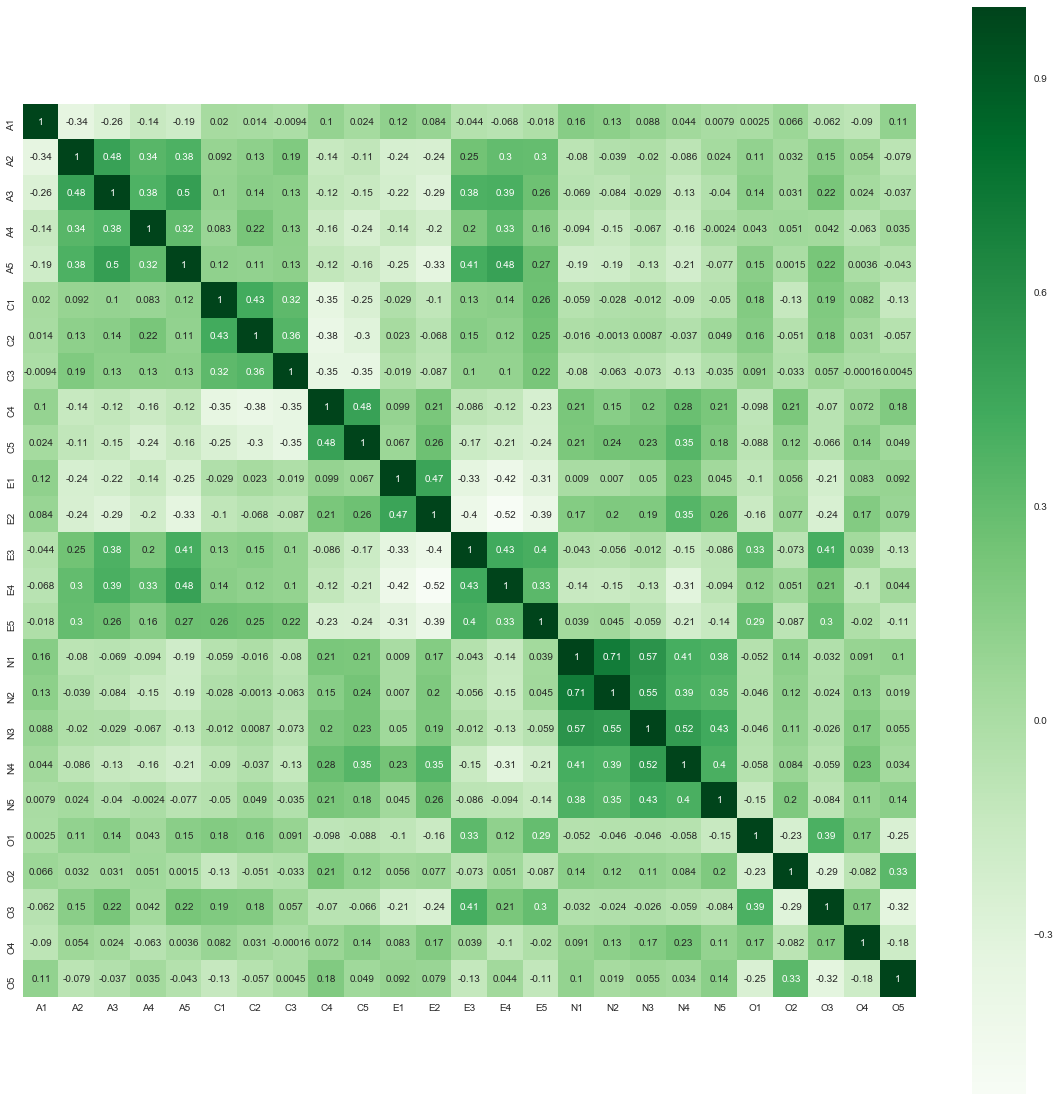

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(trust_df.corr(), cmap='Greens', annot=True, square=True)

__Comentario:__

Si bien las correlaciones no son muy altas (mayores a .6), existe correlación entre las variables del mismo grupo, es decir, entre las variables ${A}_{n}$, ${C}_{n}$, ${E}_{n}$, ${N}_{n}$ y ${O}_{n}$. La correlación más fuerte se da entre las varibales ${N}_{n}$, específicamente entre ${N}_{1}$ y ${N}_{2}$.

### Desafío 4: Extracción de factores

* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas $\lambda$ del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [14]:
# Aplico prueba de esferacidad de Barlett
factor.calculate_bartlett_sphericity(trust_df)

(16509.6735504972, 0.0)

__Comentario:__ Ya que el segundo valor es menor a .05 indica evidencia en contra de la hipótesis nula, de que esta matriz es una matriz de indentidad

In [15]:
# Aplico KMO
factor.calculate_kmo(trust_df)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

__Comentario:__ Ya que el valor es superior a *.7* se puede continuar con el análisis. Además nos encontramos con que ninguna de las variables presenta valores inferiores a *.7*.

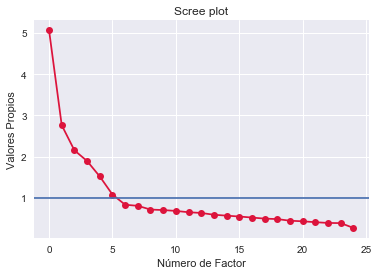

In [16]:
# Realizo factor analyzer con 10 dimensiones sin rotación
factor1 = factor.FactorAnalyzer(n_factors=10, rotation=None)
factor1.fit(trust_df)
factor_screeplot = factor1.get_eigenvalues()[0]
plt.plot(np.arange(len(factor_screeplot)), factor_screeplot, 'o-', color='crimson')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

In [17]:
# Refatorizo con 6 dimensiones y con rotación por defecto
factor2 = factor.FactorAnalyzer(n_factors=6)
factor2.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [18]:
# Genero un dataframe con factor2.loadings_
factor_loadings = pd.DataFrame(factor2.loadings_)
factor_loadings.set_index(trust_df.columns, inplace=True)
factor_loadings.columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6']
#factor_loadings
# Visualizo los mayores a .4
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

Factor1 Factor2 Factor3 Factor4 Factor5 Factor6
A1                                                
A2                                    0.64        
A3                                    0.49        
A4                                                
A5                                                
C1                    0.59                        
C2                    0.74                        
C3                    0.61                        
C4                                            0.48
C5                                                
E1                                                
E2                                                
E3            0.56                                
E4            0.65                                
E5            0.52                                
N1     0.9                                        
N2     0.9                                        
N3    0.73                                        
N4    0.46                                        
N5    0.48                                        
O1                                                
O2                            0.51                
O3                                                
O4                                                
O5                             0.6

#### Comentarios
    
* __Factor1__: Este factor está concentrado en las variables ${N}_{n}$

    * `N1` Me enojo con facilidad.
    * `N2` Me irrito con facilidad.
    * `N3` Tengo cambios de humor frecuentes.
    * `N4` Usualmente me siento melancólico.
    * `N5` Entro en pánico con facilidad.
    
_Conclusión:_ Podemos decir que este factor está asociado al `"Neuroticismo"`

* __Factor2__: Este factor se concentra en las variables ${E}_{3}$, ${E}_{4}$ y ${E}_{5}$

    * `E3` Sé cómo cautivar gente.
    * `E4` Hago amigos de forma fácil.
    * `E5` Puedo tomar el cargo de las cosas.
    
_Conclusión:_ Podemos decir que este factor está asociado a la `"Extroversión"`

* __Factor3__: Este factor se concentra en las variables ${C}_{1}$, ${C}_{2}$ y ${C}_{3}$

    * `C1` Soy exacto en mi trabajo.
    * `C2` Sigo con mis tareas hasta que todo esté perfecto.
    * `C3` Hago cosas siguiendo un plan.
    
_Conclusión:_ Podemos decir que este factor está asociado a la `"Escrupulosidad"`

* __Factor4__: Este factor se concentra en las variables ${O}_{2}$ y ${O}_{5}$

    * `O2` Evito leer material difícil.
    * `O5` No profundizaré sobre una materia específica.
    
_Conclusión:_ Podemos decir que este factor está asociado a la `"Sinceridad"`

* __Factor5__: Este factor se concentra en las variables ${A}_{2}$ y ${A}_{3}$

    * `A2` Me preocupo del bienestar de otros.
    * `A3` Sé cómo confortar a otros.
    
_Conclusión:_ Podemos decir que este factor está asociado a la `"Amabilidad"`

* __Factor6__: Este factor se concentra en la variable ${C}_{4}$

    * `C4` Hago cosas con el mínimo esfuerzo.

_Conclusión:_ Podemos decir que este factor está asociado a la `"Escrupulosidad"`. En específico, se identifican las personas que "Hacen las cosas con el mínimo esfuerzo".

### Desafío 5: Modelación de factores

* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con `kdplot`.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$$ {\hat{y}} = {{\beta }_{0} + {\beta }_{1} \cdot {gender} + {\beta }_{2} \cdot {education} + {\beta }_{3} \cdot {age} + {\epsilon}_{i} }$$

In [19]:
# Extraigo los puntajes
extract_factor_scores = factor2.transform(trust_df)
factor_df = pd.DataFrame(extract_factor_scores)
factor_df.columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6']
factor_df.head()

Factor1   Factor2   Factor3   Factor4   Factor5   Factor6
0  1.279171  0.000082  1.457212 -0.345160 -0.075729  0.197519
1 -1.773292  0.848142 -1.511693  0.260017 -1.934329 -1.440113
2  0.214909 -0.170640 -0.245855  0.368303 -0.216236 -0.152767
3 -0.074288 -0.324243  0.336190  0.179723 -1.579900 -0.938596
4  0.226286 -0.880137 -1.347977 -0.325867  0.717213 -0.142786

In [20]:
# Los agrego a la base de datos
final_df = new_df.join(factor_df)
final_df.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   O5  gender  \
5   6.0  6.0  5.0  6.0  5.0  6.0  6.0  6.0  1.0  3.0  ...  1.0       2   
7   4.0  3.0  1.0  5.0  1.0  3.0  2.0  4.0  2.0  4.0  ...  3.0       1   
10  4.0  4.0  5.0  6.0  5.0  4.0  3.0  5.0  3.0  2.0  ...  3.0       1   
14  4.0  5.0  2.0  2.0  1.0  5.0  5.0  5.0  2.0  2.0  ...  5.0       1   
22  1.0  5.0  6.0  5.0  6.0  4.0  3.0  2.0  4.0  5.0  ...  2.0       1   

    education  age   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  
5         3.0   21  0.315536  0.993906  0.042770 -0.702357  0.906266  1.080599  
7         2.0   19  1.648925 -1.045651  0.235251 -0.381872  0.609441 -0.380616  
10        1.0   21  0.989915  0.614552 -0.324332 -0.291656 -0.131274  1.066310  
14        1.0   17 -1.684845 -0.388209  0.160789  0.172256  0.570451 -0.048482  
22        5.0   68 -0.827370  0.848704 -1.044507  0.391253 -1.162846 -0.213704  

[5 rows x 34 columns]

In [21]:
# Grafico las densidades
plt.figure(figsize=(12,6))
sns.kdeplot(final_df.loc[:,'Factor1'])
sns.kdeplot(final_df.loc[:,'Factor2'])
sns.kdeplot(final_df.loc[:,'Factor3'])
sns.kdeplot(final_df.loc[:,'Factor4'])
sns.kdeplot(final_df.loc[:,'Factor5'])
sns.kdeplot(final_df.loc[:,'Factor6'])
plt.legend()

/Users/hugopriest/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/hugopriest/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


In [22]:
# Aplico modelo econométrico para Factor1: Neuroticismo
m_logit1 = smf.ols('Factor1 ~ gender + education + age', final_df).fit()
m_logit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.002   
Dependent Variable: Factor1          AIC:                4827.2412
Date:               2019-07-19 18:55 BIC:                4849.2323
No. Observations:   1804             Log-Likelihood:     -2409.6  
Df Model:           3                F-statistic:        0.08429  
Df Residuals:       1800             Prob (F-statistic): 0.969    
R-squared:          0.000            Scale:              0.84854  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    0.0001     0.1108    0.0011   0.9991   -0.2173   0.2175
gender       0.0158     0.0465    0.3391   0.7345   -0.0755   0.1071
education   -0.0067     0.0202   -0.3312   0.7405   -0.0464   0.0330
age          0.0004     0.0021    0.2127   0.8316   -0.0037   0.0046
------------------------------------------------------------------
Omnibus:               60.913       Durbin-Watson:          1.972 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       65.537
Skew:                  -0.456       Prob(JB):               0.000 
Kurtosis:              2.799        Condition No.:          170   
==================================================================

"""

In [23]:
# Aplico modelo econométrico para Factor2: Extroversión
m_logit2 = smf.ols('Factor2 ~ gender + education + age', final_df).fit()
m_logit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.001   
Dependent Variable: Factor2          AIC:                4919.2008
Date:               2019-07-19 18:55 BIC:                4941.1919
No. Observations:   1804             Log-Likelihood:     -2455.6  
Df Model:           3                F-statistic:        0.4088   
Df Residuals:       1800             Prob (F-statistic): 0.747    
R-squared:          0.001            Scale:              0.89292  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0193     0.1137   -0.1700   0.8651   -0.2423   0.2037
gender       0.0135     0.0478    0.2817   0.7782   -0.0802   0.1071
education   -0.0188     0.0208   -0.9072   0.3644   -0.0595   0.0219
age          0.0016     0.0021    0.7474   0.4549   -0.0026   0.0058
------------------------------------------------------------------
Omnibus:               82.186       Durbin-Watson:          2.014 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       45.025
Skew:                  0.222        Prob(JB):               0.000 
Kurtosis:              2.366        Condition No.:          170   
==================================================================

"""

In [24]:
# Aplico modelo econométrico para Factor3: Escrupulosidad
m_logit3 = smf.ols('Factor3 ~ gender + education + age', final_df).fit()
m_logit3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.002   
Dependent Variable: Factor3          AIC:                4677.4154
Date:               2019-07-19 18:55 BIC:                4699.4065
No. Observations:   1804             Log-Likelihood:     -2334.7  
Df Model:           3                F-statistic:        0.09810  
Df Residuals:       1800             Prob (F-statistic): 0.961    
R-squared:          0.000            Scale:              0.78091  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0182     0.1063   -0.1710   0.8643   -0.2267   0.1904
gender       0.0207     0.0447    0.4636   0.6430   -0.0669   0.1083
education   -0.0049     0.0194   -0.2528   0.8005   -0.0430   0.0332
age          0.0003     0.0020    0.1400   0.8887   -0.0037   0.0042
------------------------------------------------------------------
Omnibus:               61.662       Durbin-Watson:          1.945 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       67.288
Skew:                  -0.470       Prob(JB):               0.000 
Kurtosis:              3.102        Condition No.:          170   
==================================================================

"""

In [25]:
# Aplico modelo econométrico para Factor4: Sinceridad
m_logit4 = smf.ols('Factor4 ~ gender + education + age', final_df).fit()
m_logit4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.001   
Dependent Variable: Factor4          AIC:                4448.8807
Date:               2019-07-19 18:55 BIC:                4470.8718
No. Observations:   1804             Log-Likelihood:     -2220.4  
Df Model:           3                F-statistic:        0.6080   
Df Residuals:       1800             Prob (F-statistic): 0.610    
R-squared:          0.001            Scale:              0.68800  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0460     0.0998   -0.4610   0.6449   -0.2418   0.1497
gender      -0.0197     0.0419   -0.4693   0.6389   -0.1019   0.0625
education    0.0191     0.0182    1.0473   0.2951   -0.0167   0.0548
age          0.0008     0.0019    0.4501   0.6527   -0.0028   0.0045
------------------------------------------------------------------
Omnibus:               23.255       Durbin-Watson:          1.938 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       22.213
Skew:                  0.238        Prob(JB):               0.000 
Kurtosis:              2.736        Condition No.:          170   
==================================================================

"""

In [26]:
# Aplico modelo econométrico para Factor5: Amabilidad
m_logit5 = smf.ols('Factor5 ~ gender + education + age', final_df).fit()
m_logit5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.001   
Dependent Variable: Factor5          AIC:                4528.7431
Date:               2019-07-19 18:55 BIC:                4550.7342
No. Observations:   1804             Log-Likelihood:     -2260.4  
Df Model:           3                F-statistic:        0.3250   
Df Residuals:       1800             Prob (F-statistic): 0.807    
R-squared:          0.001            Scale:              0.71914  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0695     0.1020   -0.6811   0.4959   -0.2696   0.1306
gender       0.0146     0.0429    0.3396   0.7342   -0.0695   0.0986
education    0.0167     0.0186    0.8940   0.3714   -0.0199   0.0532
age          0.0001     0.0019    0.0260   0.9793   -0.0037   0.0038
------------------------------------------------------------------
Omnibus:             146.805       Durbin-Watson:          1.922  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       182.529
Skew:                -0.745        Prob(JB):               0.000  
Kurtosis:            3.454         Condition No.:          170    
==================================================================

"""

In [27]:
# Aplico modelo econométrico para Factor6: Escrupulosidad
m_logit6 = smf.ols('Factor6 ~ gender + education + age', final_df).fit()
m_logit6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.000    
Dependent Variable: Factor6          AIC:                4299.0166
Date:               2019-07-19 18:55 BIC:                4321.0076
No. Observations:   1804             Log-Likelihood:     -2145.5  
Df Model:           3                F-statistic:        1.215    
Df Residuals:       1800             Prob (F-statistic): 0.303    
R-squared:          0.002            Scale:              0.63315  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    0.0659     0.0957    0.6888   0.4911   -0.1218   0.2537
gender      -0.0696     0.0402   -1.7318   0.0835   -0.1485   0.0092
education    0.0030     0.0175    0.1706   0.8645   -0.0313   0.0373
age          0.0014     0.0018    0.8007   0.4234   -0.0021   0.0050
------------------------------------------------------------------
Omnibus:              71.735       Durbin-Watson:          1.899  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       211.372
Skew:                 -0.057       Prob(JB):               0.000  
Kurtosis:             4.673        Condition No.:          170    
==================================================================

"""

__Conclusión:__ Se puede ver que en ningún caso, el p-value tiene un valor inferior a .05. Dado esto se puede inferir que no tienen relación con el factor, es decir, ni el género, educación o edad determinan el grado de Neuroticismo, Escrupolisidad, Extroversión, Amabilidad o Sinceridad.